# **Sales Advertising Analysis**

## 1️⃣ **Introduction**

This project focuses on analyzing the effectiveness of advertising strategies across various channels, including traditional media such as TV, radio, and newspapers, as well as digital marketing. Linear regression is employed to predict sales, aiming to inform strategic decision-making in marketing.

## 2️⃣ **Data Cleaning**

Import all the needed libraries such as: pandas, matplotlib.pyplot, seaborn, statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Load the data by the following link:\
https://raw.githubusercontent.com/letuanGithubVn1/Sales-advertising-analysis/refs/heads/master/sales_advertising.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/letuanGithubVn1/Sales-advertising-analysis/refs/heads/master/sales_advertising.csv')

Let's take a look at the loaded data.

Output 5 random rows:

In [ ]:
df.sample(5)

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
2012,915.793708,175.853235,166.744502,1296.735391,9551.409428
89,524.993433,103.644699,67.186641,816.932744,5767.996170
636,579.355540,314.509302,77.076311,1217.693288,7927.473962
200,677.828482,187.020691,125.458191,1346.418150,9711.360655
2088,839.892845,189.431203,207.287926,1152.514016,8497.895885


Then it's reasonable to take a look at columns, dtypes and non-null values. Let's output this.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             4985 non-null   float64
 1   radio_ads          4982 non-null   float64
 2   newspaper_ads      4977 non-null   float64
 3   digital_marketing  4974 non-null   float64
 4   sales              4982 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


*Show* a descriptive statistics of all columns:

In [ ]:
df.describe()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
count,4985.000000,4982.000000,4977.000000,4974.000000,4982.000000
mean,553.657446,271.148836,165.331063,1114.553668,7758.601336
std,309.177632,128.558088,78.497351,518.141180,2788.705500
min,100.010471,50.023772,30.042591,200.454418,1043.825466
25%,321.262698,161.161510,96.729169,674.282712,5483.593562
50%,550.361031,268.687208,163.928071,1124.985865,7836.046852
75%,774.432493,380.026295,235.335541,1552.196991,9986.817587
max,6735.856228,499.777335,299.947389,1999.864688,14322.724102


### **📦 Handling Missing Values**

Choose any approach how to handle missing values and apply it.

In [ ]:
# def fill_mising_with_mean(df, columns):
#   for c in columns:
#     if c in df.columns:
#       df[c] = df[c].fillna(df[c].mean())
#   return df

# columns_to_fill = ['tv_ads', 'radio_ads', 'newspaper_ads', 'digital_marketing', 'sales']

# df_cleaned = fill_mising_with_mean(df, columns_to_fill)

def fill_mising_with_mean(df):
  for c in df.columns:
      df.fillna({c: df[c].mean()}, inplace=True)
  return df

df_cleaned = fill_mising_with_mean(df)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             5000 non-null   float64
 1   radio_ads          5000 non-null   float64
 2   newspaper_ads      5000 non-null   float64
 3   digital_marketing  5000 non-null   float64
 4   sales              5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


### **📦 Handling Outliers**

Let's remove outliers

In [ ]:
def remove_outlier(df):
  for column in df.columns:

    Q1 = df[column].quantile(q=0.25)
    Q3 = df[column].quantile(q=0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return df

df_remove_outllier = remove_outlier(df_cleaned)


In [ ]:
# columns_to_remove = ['tv_ads', 'radio_ads', 'newspaper_ads', 'digital_marketing', 'sales']
# df_remove_outllier = df_cleaned
# for column in columns_to_remove:
#   df_remove_outllier = remove_outlier(column, df_remove_outllier)

In [ ]:
df_remove_outllier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             4993 non-null   float64
 1   radio_ads          4993 non-null   float64
 2   newspaper_ads      4993 non-null   float64
 3   digital_marketing  4993 non-null   float64
 4   sales              4993 non-null   float64
dtypes: float64(5)
memory usage: 234.0 KB


## **3️⃣  Calculating Correlations**

**Objective:** Calculate and interpret correlations between variables in the dataset.

### **🧮 Calculations**

Finally, let's calculate correlations in the dataset and write insights and conclusion.


In [ ]:
matrix_columns = df_remove_outllier.corr()
matrix_columns

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
tv_ads,1.000000,-0.006607,0.001231,0.028083,0.302529
radio_ads,-0.006607,1.000000,-0.007957,-0.001603,0.091468
newspaper_ads,0.001231,-0.007957,1.000000,-0.001148,-0.002389
digital_marketing,0.028083,-0.001603,-0.001148,1.000000,0.934231
sales,0.302529,0.091468,-0.002389,0.934231,1.000000


Then plot it as a heatmap using Seaborn:

Text(0.5, 1.0, 'the relationship between advertising costs for each channel and sales')

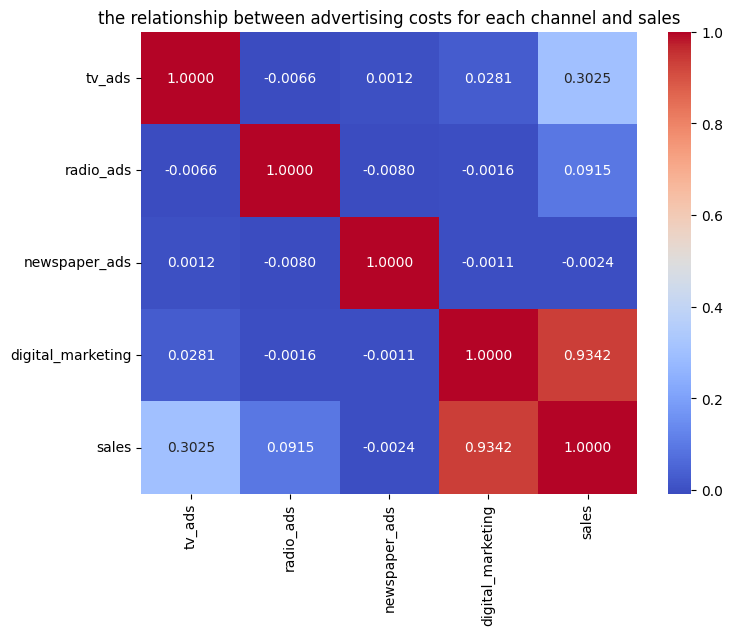

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(matrix_columns, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('the relationship between advertising costs for each channel and sales')

## **4️⃣ Regression**

**1. Create variables $x$ and $y$ containing 2 columns that you want to use for fitting multiple linear regression:**

In [ ]:
df.head()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
0,437.086107,227.135984,149.687216,1099.406439,7753.504975
1,955.642876,263.046047,145.524769,1544.144191,11683.762317
2,758.794548,434.546327,112.930487,1212.800205,8910.744929
3,638.792636,203.001974,250.521225,349.944650,3339.284889
4,240.416776,441.342358,157.564771,534.044426,4361.964031


In [ ]:
y = df_remove_outllier['sales']
x = df_remove_outllier[['tv_ads', 'radio_ads', 'newspaper_ads', 'digital_marketing']]

In [ ]:
x.head()

,const,tv_ads,radio_ads,newspaper_ads,digital_marketing
0,1.0,437.086107,227.135984,149.687216,1099.406439
1,1.0,955.642876,263.046047,145.524769,1544.144191
2,1.0,758.794548,434.546327,112.930487,1212.800205
3,1.0,638.792636,203.001974,250.521225,349.944650
4,1.0,240.416776,441.342358,157.564771,534.044426


**2. Add a contant to $x$**

In [ ]:
x = sm.add_constant(x)

**3. Fit simple linear regression model**

In [ ]:
model = sm.OLS(y, x).fit()

**4. Print the summary**

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.856e+04
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        06:50:21   Log-Likelihood:                -38763.
No. Observations:                4993   AIC:                         7.754e+04
Df Residuals:                    4988   BIC:                         7.757e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                23.1416     35.02

## 5️⃣ **Forecasting**

### 1. What if we will stop spending for newspaper ads?

In [ ]:
test_data = pd.DataFrame({
          'tv_ads':             [500, 500],
          'radio_ads':          [500, 500],
          'newspaper_ads':      [500, 0],
          'digital_marketing':  [500, 500]
})

test_data = sm.add_constant(test_data, has_constant='add')

predictions = model.predict(test_data)
print(predictions)


0    5009.479508
1    5025.709195
dtype: float64


**Conclusions:**  
- When spending on newspaper ads is stopped (newspaper_ads = 0), the predicted sales increase from 5009.48 to 5025.71
- Halting spending on newspaper advertising might help slightly boost sales


### 2. What if we will focus on a particular source (conclusion about each ads source)?

In [ ]:
test_data = pd.DataFrame({
          'tv_ads':             [500, 0, 0, 0],
          'radio_ads':          [0, 500, 0, 0],
          'newspaper_ads':      [0, 0, 500, 0],
          'digital_marketing':  [0, 0, 0, 500]
})

test_data = sm.add_constant(test_data, has_constant='add')

predictions = model.predict(test_data)
print(predictions)

0    1502.361847
1    1051.263411
2       6.911903
3    2518.367116
dtype: float64


**Conclusions:** The model predicts the revenue from each channel with an initial cost of **500** for each. The results show that digital marketing performs best, with a predicted revenue of **2518.37**, followed by TV ads (1502.36), radio (1051.26), and lastly newspaper ads, which are the least effective, generating only **6.91**.  


### 3. What if we will stop ads at all?

In [ ]:
test_data = pd.DataFrame({
          'tv_ads':             [0],
          'radio_ads':          [0],
          'newspaper_ads':      [0],
          'digital_marketing':  [0]
})

test_data = sm.add_constant(test_data, has_constant='add')

predictions = model.predict(test_data)
print(predictions)

0    23.14159
dtype: float64


**Conclusions:** If all advertising activities stop, the model predicts that the business can still achieve revenue of about **23.14**. This could be due to reasons like loyal customers, natural market demand, and sales channels that don’t rely on advertising (such as direct or offline sales).

### **Recommendation**

- *Enterprises may consider reducing or discontinuing expenditures on newspaper advertising, particularly when marketing budgets are limited, and reallocating resources to strengthen investment in digital channels and Radio (if the budget allows)*
- *If the digital channel starts showing signs of diminishing returns or the market becomes saturated, it basically means we've already reached most of the potential customers who use the Internet. In that case, businesses might consider shifting to TV and radio channels if there's still a substantial advertising budget available.*